<a href="https://colab.research.google.com/github/droobun/Unsupervised_Learning_HW/blob/main/Myopia_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pathlib import Path
import seaborn
import matplotlib.pyplot as plt
from google.colab import drive 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Import the data, Part 1
myopia_data = pd.read_csv('https://raw.githubusercontent.com/droobun/Unsupervised_Learning_HW/main/myopia.csv')
labels = myopia_data['MYOPIC']
myopia_data = myopia_data.drop('MYOPIC', axis = 1)
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
myopia_data.shape

(618, 14)

In [4]:
myopia_data.shape
myopia_data.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
dtype: int64

In [5]:
sc = StandardScaler()

myopia_data_scale = sc.fit_transform(myopia_data)

In [6]:
# Part 2

pca = PCA(n_components=.9)
pca2 = pca.fit_transform(myopia_data_scale)



In [7]:
tsne = TSNE(n_components=3)
tsne_features = tsne.fit_transform(pca2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [8]:
tsne_features.shape

(618, 3)

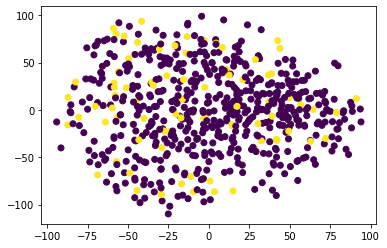

In [9]:
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

In [10]:
#Part 3: Perform a Cluster Analysis with K-means

inertia = []
k = range(1,11)

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(myopia_data)
    inertia.append(kmeans.inertia_)

In [11]:
# create elbow chart and determine where elbow is

elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()


,k,inertia
0,1,234007.104068
1,2,126211.687610
2,3,93108.597058
3,4,78236.040289
4,5,67245.959484


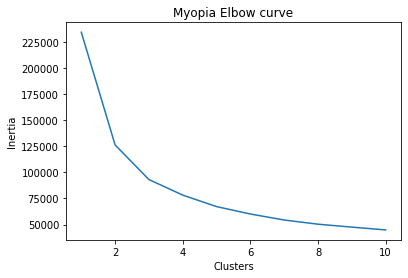

In [12]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Myopia Elbow curve')
plt.show()

In [13]:
len(pca.components_)

10

In [14]:
columns=[]

for i in range(0,10):
    columns.append(i+1)
    
pca_df = pd.DataFrame(pca2, columns=columns)
pca_df['cluster']= kmeans.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,cluster
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,9
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,8
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0


In [15]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(pca_df)
predictions = model.predict(pca_df)

pca_df['cluster'] = model.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


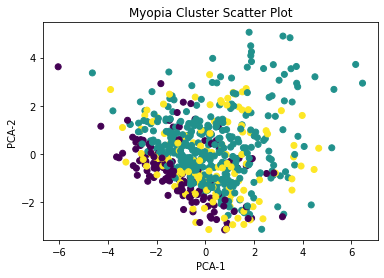

In [16]:
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['cluster'])
plt.title('Myopia Cluster Scatter Plot')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.show()

Part 4: Make a Recommendation

After performing a Cluster Analysis with the K-Means Model, I discovered that:


*  The optimal number of clusters is 3 - Elbow Chart analysis
*  A few small patterns in the K-Means Clustering, but nothing clear.

My final conclusion would be to provide a bigger dataset to better define clusters for more accurate and quality analysis. 618 total samples is not a big enough dataset to effectively cluster the data to make accurate predictions.

